<a href="https://colab.research.google.com/github/LauraOrozcoCeron/ClassificationModel/blob/main/Laura_Orozco_data_scientist_assessment_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run this cell first
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data scientist assessment test

All code should run with no errors. The notebook will be cache cleared and run again from scratch, please make sure to not delete any important step for the final solution. The output can be kept as session object, no need to store it.
<br>
<br>
The candidate will have one week to complete the exercise. This assessment shouldn't take more than few hours; if the candidate is not able to finish all the requirements, it is possible to write comments or text cells with thoughts and possible further steps. Everything written in this notebook will be taken into consideration, so please write comments, reasonings and clear steps.

## Instant messaging detection
The following 2 datasets are given: '/content/drive/MyDrive/assessment_data/train_data.parquet' and '/content/drive/MyDrive/assessment_data/evaluation_data.parquet'
<br>
<br>
Let's assume the client asks the data scientist to detect any instant messaging application in their network traffic. A dataset with known apps and categories is provided (train_data.parquet). The candidate should train and validate the detector over the train_data.parquet, provide validation metrics and run the final version of the model over the evaluation_data.parquet.
<br>
<br>
The KPI for this detector is **precision.**
<br>
<br>
As first steps, please perform the following initial tasks:

Read both the dataset using polars library (all code cells need to be run)
<br>
We use polars because it reads datasets using pyarrow backend instead of numpy like pandas does. In this way we are going to save RAM and work more efficiently. If you come from pandas and don't know polars library, please look at this page: https://pola-rs.github.io/polars-book/user-guide/coming_from_pandas.html
<br>
**NOTE**: The candidate is free to use pandas instead of polars, however be aware that reading the whole data with pandas will crash the colab notebook due to RAM overload. In case pandas will be the framework of choice, the candidate will be responsible of the reading process (no need to run the following two cells).

In [ ]:
# !pip install polars
import polars as pl

In [ ]:
# example
df = pl.read_parquet('/content/drive/MyDrive/assessment_data/train_data.parquet')

In [ ]:
df.head()

shape: (5, 31)
┌───────────┬────────────┬───────┬───────────┬───┬────────────┬────────────┬──────────┬────────────┐
│ tcp_flags ┆ tcp_flags_ ┆ bytes ┆ bytes_rev ┆ … ┆ flag_fin_r ┆ iat_list   ┆ directio ┆ sizes_list │
│ ---       ┆ rev        ┆ ---   ┆ ---       ┆   ┆ ev         ┆ ---        ┆ ns       ┆ ---        │
│ i64       ┆ ---        ┆ i64   ┆ i64       ┆   ┆ ---        ┆ list[f32]  ┆ ---      ┆ list[f32]  │
│           ┆ i64        ┆       ┆           ┆   ┆ bool       ┆            ┆ list[f32 ┆            │
│           ┆            ┆       ┆           ┆   ┆            ┆            ┆ ]        ┆            │
╞═══════════╪════════════╪═══════╪═══════════╪═══╪════════════╪════════════╪══════════╪════════════╡
│ 26        ┆ 26         ┆ 3348  ┆ 9405      ┆ … ┆ false      ┆ [0.0,      ┆ [1.0,    ┆ [517.0,    │
│           ┆            ┆       ┆           ┆   ┆            ┆ 18.0, …    ┆ -1.0, …  ┆ 1418.0, …  │
│           ┆            ┆       ┆           ┆   ┆            ┆ 0.0]       ┆ 0.0]     ┆ 0.0]       │
│ 27        ┆ 27         ┆ 1390  ┆ 10733     ┆ … ┆ true       ┆ [0.0,      ┆ [1.0,    ┆ [246.0,    │
│           ┆            ┆       ┆           ┆   ┆            ┆ 90.0, …    ┆ -1.0, …  ┆ 1448.0, …  │
│           ┆            ┆       ┆           ┆   ┆            ┆ 0.0]       ┆ 0.0]     ┆ 0.0]       │
│ 26        ┆ 26         ┆ 2939  ┆ 1513      ┆ … ┆ false      ┆ [0.0,      ┆ [1.0,    ┆ [596.0,    │
│           ┆            ┆       ┆           ┆   ┆            ┆ 18.0, …    ┆ -1.0, …  ┆ 212.0, …   │
│           ┆            ┆       ┆           ┆   ┆            ┆ 0.0]       ┆ 0.0]     ┆ 0.0]       │
│ 26        ┆ 26         ┆ 1785  ┆ 3471      ┆ … ┆ false      ┆ [0.0,      ┆ [1.0,    ┆ [222.0,    │
│           ┆            ┆       ┆           ┆   ┆            ┆ 94.0, …    ┆ -1.0, …  ┆ 1460.0, …  │
│           ┆            ┆       ┆           ┆   ┆            ┆ 0.0]       ┆ 0.0]     ┆ 0.0]       │
│ 27        ┆ 27         ┆ 1893  ┆ 5554      ┆ … ┆ true       ┆ [0.0,      ┆ [1.0,    ┆ [517.0,    │
│           ┆            ┆       ┆           ┆   ┆            ┆ 11.0, …    ┆ -1.0, …  ┆ 1448.0, …  │
│           ┆            ┆       ┆           ┆   ┆            ┆ 0.0]       ┆ 0.0]     ┆ 0.0]       │
└───────────┴────────────┴───────┴───────────┴───┴────────────┴────────────┴──────────┴────────────┘

The dataset contains the following columns:
- tcp_flags, tcp_flag_rev: count of tcp flag for uplink direction and downlink direction respectively
- bytes, bytes_rev: total uplink, downlink bytes of the full connection
- packets, packets rev: count of uplink, downlink packets of the full connections
- roundtrips: count of changes of flow direction
- ppi_len: count of non 0 bytes packets within the first 30 packets
- ppi_duration: time (in seconds) duration of the series of the first non 0 bytes packets
- duration: duration (in seconds) of the whole connection
- app: application ID (**not given in the evaluation data**)
- category: category ID (**not given in the evaluation data**)
- flag_cwr, flag_cwr_rev, flag_ece, flag_ece_rev, flag_urg, flag_urg_rev, flag_psh, flag_psh_rev, flag_rst, flag_rst_rev, flag_syn, flag_syn_rev, flag_fin, flag_fin_rev: boolean presence of the TCP flag on uplink and downlink flows. In case of UDP they are always false.
- iat_list: list of the first 30 packets' inter arrival time (0 padding in case of connections with less than 30 pakcets with payload)
- directions: list of directions (1: uplink, -1: downlink) of the first 30 packets (0 padding in case of connections with less than 30 pakcets with payload)
- sizes_list: list of the first 30 packets' sizes (0 padding in case of connections with less than 30 pakcets with payload)

In [ ]:
import json
app_dict = json.load(open('/content/drive/MyDrive/assessment_data/app_enum.json'))
category_dict = json.load(open('/content/drive/MyDrive/assessment_data/category_enum.json'))

*app_dict* and *category_dict* contain the mapping for app and category columns
<br>
<br>
The task asks the candidate only to detect "Instant messaging" category. The candidate cannot use the column app to directly detect the corresponding category. In fact, the evaluation_data.parquet will contain neither *app* nor *category* columns.
<br>
<br>
The candidate can perform any explorative analysis, report comments and provide any solution with any approach desired. The candidate has complete freedom on further feature engineering or feature selection. Any native python library can be imported, also any major data science library such as sklearn, numpy or keras can be used. If a library is not available, it is possible to install it with *!pip install \<package\>*

In [ ]:
# code here

First, I explore the test dataframe as suggested in the text above, which does not contain the same columns as train, as previously mentioned. Then I will start validating the data that is available in the dictionaries provided to try to find the variable of interest Instant Messages.

In [ ]:
df_test = pl.read_parquet('/content/drive/MyDrive/assessment_data/evaulation_data.parquet')

In [ ]:
df_test.head()

shape: (5, 29)
┌───────────┬────────────┬───────┬───────────┬───┬────────────┬────────────┬──────────┬────────────┐
│ tcp_flags ┆ tcp_flags_ ┆ bytes ┆ bytes_rev ┆ … ┆ flag_fin_r ┆ iat_list   ┆ directio ┆ sizes_list │
│ ---       ┆ rev        ┆ ---   ┆ ---       ┆   ┆ ev         ┆ ---        ┆ ns       ┆ ---        │
│ i64       ┆ ---        ┆ i64   ┆ i64       ┆   ┆ ---        ┆ list[f32]  ┆ ---      ┆ list[f32]  │
│           ┆ i64        ┆       ┆           ┆   ┆ bool       ┆            ┆ list[f32 ┆            │
│           ┆            ┆       ┆           ┆   ┆            ┆            ┆ ]        ┆            │
╞═══════════╪════════════╪═══════╪═══════════╪═══╪════════════╪════════════╪══════════╪════════════╡
│ 27        ┆ 27         ┆ 19504 ┆ 9425      ┆ … ┆ true       ┆ [0.0,      ┆ [1.0,    ┆ [214.0,    │
│           ┆            ┆       ┆           ┆   ┆            ┆ 128.0, …   ┆ -1.0, …  ┆ 1460.0, …  │
│           ┆            ┆       ┆           ┆   ┆            ┆ 0.0]       ┆ 0.0]     ┆ 0.0]       │
│ 27        ┆ 27         ┆ 2891  ┆ 5522      ┆ … ┆ true       ┆ [0.0,      ┆ [1.0,    ┆ [182.0,    │
│           ┆            ┆       ┆           ┆   ┆            ┆ 121.0, …   ┆ -1.0, …  ┆ 100.0, …   │
│           ┆            ┆       ┆           ┆   ┆            ┆ 0.0]       ┆ 0.0]     ┆ 0.0]       │
│ 31        ┆ 27         ┆ 2586  ┆ 4577      ┆ … ┆ true       ┆ [0.0,      ┆ [1.0,    ┆ [216.0,    │
│           ┆            ┆       ┆           ┆   ┆            ┆ 27.0, …    ┆ -1.0, …  ┆ 1460.0, …  │
│           ┆            ┆       ┆           ┆   ┆            ┆ 0.0]       ┆ 0.0]     ┆ 0.0]       │
│ 30        ┆ 27         ┆ 1567  ┆ 2232      ┆ … ┆ true       ┆ [0.0, 1.0, ┆ [1.0,    ┆ [519.0,    │
│           ┆            ┆       ┆           ┆   ┆            ┆ … 0.0]     ┆ -1.0, …  ┆ 212.0, …   │
│           ┆            ┆       ┆           ┆   ┆            ┆            ┆ 0.0]     ┆ 0.0]       │
│ 26        ┆ 26         ┆ 1940  ┆ 1585      ┆ … ┆ false      ┆ [0.0,      ┆ [1.0,    ┆ [233.0,    │
│           ┆            ┆       ┆           ┆   ┆            ┆ 21.0, …    ┆ -1.0, …  ┆ 141.0, …   │
│           ┆            ┆       ┆           ┆   ┆            ┆ 0.0]       ┆ 0.0]     ┆ 0.0]       │
└───────────┴────────────┴───────┴───────────┴───┴────────────┴────────────┴──────────┴────────────┘

In [ ]:
df_test.describe()

shape: (9, 30)
┌───────────┬───────────┬────────────┬───────────┬───┬────────────┬──────────┬──────────┬──────────┐
│ describe  ┆ tcp_flags ┆ tcp_flags_ ┆ bytes     ┆ … ┆ flag_fin_r ┆ iat_list ┆ directio ┆ sizes_li │
│ ---       ┆ ---       ┆ rev        ┆ ---       ┆   ┆ ev         ┆ ---      ┆ ns       ┆ st       │
│ str       ┆ f64       ┆ ---        ┆ f64       ┆   ┆ ---        ┆ str      ┆ ---      ┆ ---      │
│           ┆           ┆ f64        ┆           ┆   ┆ f64        ┆          ┆ str      ┆ str      │
╞═══════════╪═══════════╪════════════╪═══════════╪═══╪════════════╪══════════╪══════════╪══════════╡
│ count     ┆ 5.284744e ┆ 5.284744e6 ┆ 5.284744e ┆ … ┆ 5.284744e6 ┆ 5284744  ┆ 5284744  ┆ 5284744  │
│           ┆ 6         ┆            ┆ 6         ┆   ┆            ┆          ┆          ┆          │
│ null_coun ┆ 0.0       ┆ 0.0        ┆ 0.0       ┆ … ┆ 0.0        ┆ 0        ┆ 0        ┆ 0        │
│ t         ┆           ┆            ┆           ┆   ┆            ┆          ┆          ┆          │
│ mean      ┆ 39.005389 ┆ 29.219957  ┆ 26216.587 ┆ … ┆ 0.59919    ┆ null     ┆ null     ┆ null     │
│           ┆           ┆            ┆ 499       ┆   ┆            ┆          ┆          ┆          │
│ std       ┆ 45.950896 ┆ 13.563476  ┆ 5.5274e6  ┆ … ┆ 0.490384   ┆ null     ┆ null     ┆ null     │
│ min       ┆ 20.0      ┆ 4.0        ┆ 224.0     ┆ … ┆ 0.0        ┆ null     ┆ null     ┆ null     │
│ max       ┆ 223.0     ┆ 223.0      ┆ 5.4093e9  ┆ … ┆ 1.0        ┆ null     ┆ null     ┆ null     │
│ median    ┆ 27.0      ┆ 27.0       ┆ 2401.0    ┆ … ┆ 1.0        ┆ null     ┆ null     ┆ null     │
│ 25%       ┆ 26.0      ┆ 26.0       ┆ 1521.0    ┆ … ┆ null       ┆ null     ┆ null     ┆ null     │
│ 75%       ┆ 27.0      ┆ 27.0       ┆ 4327.0    ┆ … ┆ null       ┆ null     ┆ null     ┆ null     │
└───────────┴───────────┴────────────┴───────────┴───┴────────────┴──────────┴──────────┴──────────┘

In [ ]:
app_dict

{'default': 0,
 'eset-edf': 1,
 'eset-ts': 2,
 'eset-epns': 3,
 'eset-edtd': 4,
 'eset-esa': 5,
 'mcafee-gti': 6,
 'mcafee-realprotect': 7,
 'mcafee-ccs': 8,
 'bitdefender-gravityzone': 9,
 'bitdefender-nimbus': 10,
 'adobe-cloud': 11,
 'adobe-analytics': 12,
 'adobe-search': 13,
 'adobe-updater': 14,
 'adobe-authentication': 15,
 'adobe-notifications': 16,
 'adobe-ads': 17,
 'google-www': 18,
 'google-play': 19,
 'google-services': 20,
 'google-authentication': 21,
 'google-connectivity': 22,
 'google-fonts': 23,
 'google-drive': 24,
 'google-translate': 25,
 'gmail': 26,
 'youtube': 27,
 'google-hangouts': 28,
 'google-ads': 29,
 'google-safebrowsing': 30,
 'chrome-remotedesktop': 31,
 'google-userlocation': 32,
 'apple-itunes': 33,
 'apple-icloud': 34,
 'apple-siri': 35,
 'apple-updates': 36,
 'apple-push': 37,
 'apple-weather': 38,
 'apple-location': 39,
 'apple-ocsp': 40,
 'apple-authentication': 41,
 'apple-pancake': 42,
 'microsoft-onedrive': 43,
 'outlook': 44,
 'office-365': 4

In the dictionary category dict I found the equvalence of the code that refers to instant messages so from this variable you can create a dummy variable where 1 means that it was an instant message and 0 otherwise

In [ ]:
category_dict

{'default': 0,
 'Antivirus': 1,
 'Notification services': 2,
 'Authentication services': 3,
 'File sharing': 4,
 'Analytics & Telemetry': 5,
 'Search': 6,
 'Software updates': 7,
 'Advertising': 8,
 'Other services and APIs': 9,
 'Streaming media': 10,
 'Mail': 11,
 'Videoconferencing': 12,
 'Remote Desktop': 13,
 'Music': 14,
 'Virtual assistant': 15,
 'Weather services': 16,
 'Instant messaging': 17,
 'Social': 18,
 'Games': 19,
 'Information Systems': 20,
 'Internet Banking': 21}

Try to convert a dictionary in a dataframe in polars

In [ ]:
app_df = pl.DataFrame({
            'key': list(app_dict.keys()),
            'value': list(app_dict.values()),
        })

app_df.head(5)

shape: (5, 2)
┌───────────┬───────┐
│ key       ┆ value │
│ ---       ┆ ---   │
│ str       ┆ i64   │
╞═══════════╪═══════╡
│ default   ┆ 0     │
│ eset-edf  ┆ 1     │
│ eset-ts   ┆ 2     │
│ eset-epns ┆ 3     │
│ eset-edtd ┆ 4     │
└───────────┴───────┘

In [ ]:
category_df = pl.DataFrame({
            'key': list(category_dict.keys()),
            'value': list(category_dict.values()),
        })

category_df.head(5)

shape: (5, 2)
┌─────────────────────────┬───────┐
│ key                     ┆ value │
│ ---                     ┆ ---   │
│ str                     ┆ i64   │
╞═════════════════════════╪═══════╡
│ default                 ┆ 0     │
│ Antivirus               ┆ 1     │
│ Notification services   ┆ 2     │
│ Authentication services ┆ 3     │
│ File sharing            ┆ 4     │
└─────────────────────────┴───────┘

In [ ]:
join_category = df.join(category_df, left_on="category", right_on="value")
print(join_category)

shape: (4_850_062, 32)
┌───────────┬────────────┬───────┬───────────┬───┬────────────┬──────────┬────────────┬────────────┐
│ tcp_flags ┆ tcp_flags_ ┆ bytes ┆ bytes_rev ┆ … ┆ iat_list   ┆ directio ┆ sizes_list ┆ key        │
│ ---       ┆ rev        ┆ ---   ┆ ---       ┆   ┆ ---        ┆ ns       ┆ ---        ┆ ---        │
│ i64       ┆ ---        ┆ i64   ┆ i64       ┆   ┆ list[f32]  ┆ ---      ┆ list[f32]  ┆ str        │
│           ┆ i64        ┆       ┆           ┆   ┆            ┆ list[f32 ┆            ┆            │
│           ┆            ┆       ┆           ┆   ┆            ┆ ]        ┆            ┆            │
╞═══════════╪════════════╪═══════╪═══════════╪═══╪════════════╪══════════╪════════════╪════════════╡
│ 26        ┆ 26         ┆ 3348  ┆ 9405      ┆ … ┆ [0.0,      ┆ [1.0,    ┆ [517.0,    ┆ Other      │
│           ┆            ┆       ┆           ┆   ┆ 18.0, …    ┆ -1.0, …  ┆ 1418.0, …  ┆ services   │
│           ┆            ┆       ┆           ┆   ┆ 0.0]       ┆ 0.0]

In [ ]:
join_app = join_category.join(app_df, left_on="app", right_on="value")
print(join_app)

shape: (4_850_062, 33)
┌───────────┬────────────┬───────┬───────────┬───┬──────────┬────────────┬────────────┬────────────┐
│ tcp_flags ┆ tcp_flags_ ┆ bytes ┆ bytes_rev ┆ … ┆ directio ┆ sizes_list ┆ key        ┆ key_right  │
│ ---       ┆ rev        ┆ ---   ┆ ---       ┆   ┆ ns       ┆ ---        ┆ ---        ┆ ---        │
│ i64       ┆ ---        ┆ i64   ┆ i64       ┆   ┆ ---      ┆ list[f32]  ┆ str        ┆ str        │
│           ┆ i64        ┆       ┆           ┆   ┆ list[f32 ┆            ┆            ┆            │
│           ┆            ┆       ┆           ┆   ┆ ]        ┆            ┆            ┆            │
╞═══════════╪════════════╪═══════╪═══════════╪═══╪══════════╪════════════╪════════════╪════════════╡
│ 26        ┆ 26         ┆ 3348  ┆ 9405      ┆ … ┆ [1.0,    ┆ [517.0,    ┆ Other      ┆ google-pla │
│           ┆            ┆       ┆           ┆   ┆ -1.0, …  ┆ 1418.0, …  ┆ services   ┆ y          │
│           ┆            ┆       ┆           ┆   ┆ 0.0]     ┆ 0.0]  

In [ ]:
df_cats = join_app.rename({"key": "category_name", "key_right": "app_name"})

In [ ]:
df_cats.head

<bound method DataFrame.head of shape: (4_850_062, 33)
┌───────────┬────────────┬───────┬───────────┬───┬──────────┬────────────┬────────────┬────────────┐
│ tcp_flags ┆ tcp_flags_ ┆ bytes ┆ bytes_rev ┆ … ┆ directio ┆ sizes_list ┆ category_n ┆ app_name   │
│ ---       ┆ rev        ┆ ---   ┆ ---       ┆   ┆ ns       ┆ ---        ┆ ame        ┆ ---        │
│ i64       ┆ ---        ┆ i64   ┆ i64       ┆   ┆ ---      ┆ list[f32]  ┆ ---        ┆ str        │
│           ┆ i64        ┆       ┆           ┆   ┆ list[f32 ┆            ┆ str        ┆            │
│           ┆            ┆       ┆           ┆   ┆ ]        ┆            ┆            ┆            │
╞═══════════╪════════════╪═══════╪═══════════╪═══╪══════════╪════════════╪════════════╪════════════╡
│ 26        ┆ 26         ┆ 3348  ┆ 9405      ┆ … ┆ [1.0,    ┆ [517.0,    ┆ Other      ┆ google-pla │
│           ┆            ┆       ┆           ┆   ┆ -1.0, …  ┆ 1418.0, …  ┆ services   ┆ y          │
│           ┆            ┆       ┆  

In [ ]:

df_cats = df_cats.with_columns([
    df_cats['category_name'],  # La nueva columna
    pl.when(df_cats['category_name'] == 'Instant messaging').then(1).otherwise(0).alias('IM')  # Valores de la nueva columna
])


With this describes i can see that try to recognize a Instant Message is a realy hard work, beacuse only the 1.3% have this condition, is a very imbalanced data. With the condition of data imbalance we can think of a technique to overcome this data problem, one technique could be the oversampling of the data, so that the minority class is equivalent in records to the majority class (Instant Messages =0).

In [ ]:
df_cats.describe()

shape: (9, 35)
┌───────────┬───────────┬────────────┬───────────┬───┬──────────┬────────────┬──────────┬──────────┐
│ describe  ┆ tcp_flags ┆ tcp_flags_ ┆ bytes     ┆ … ┆ sizes_li ┆ category_n ┆ app_name ┆ IM       │
│ ---       ┆ ---       ┆ rev        ┆ ---       ┆   ┆ st       ┆ ame        ┆ ---      ┆ ---      │
│ str       ┆ f64       ┆ ---        ┆ f64       ┆   ┆ ---      ┆ ---        ┆ str      ┆ f64      │
│           ┆           ┆ f64        ┆           ┆   ┆ str      ┆ str        ┆          ┆          │
╞═══════════╪═══════════╪════════════╪═══════════╪═══╪══════════╪════════════╪══════════╪══════════╡
│ count     ┆ 4.850062e ┆ 4.850062e6 ┆ 4.850062e ┆ … ┆ 4850062  ┆ 4850062    ┆ 4850062  ┆ 4.850062 │
│           ┆ 6         ┆            ┆ 6         ┆   ┆          ┆            ┆          ┆ e6       │
│ null_coun ┆ 0.0       ┆ 0.0        ┆ 0.0       ┆ … ┆ 0        ┆ 0          ┆ 0        ┆ 0.0      │
│ t         ┆           ┆            ┆           ┆   ┆          ┆            ┆          ┆          │
│ mean      ┆ 39.003807 ┆ 29.078158  ┆ 21650.614 ┆ … ┆ null     ┆ null       ┆ null     ┆ 0.01346  │
│           ┆           ┆            ┆ 504       ┆   ┆          ┆            ┆          ┆          │
│ std       ┆ 45.978641 ┆ 13.06056   ┆ 3.4556e6  ┆ … ┆ null     ┆ null       ┆ null     ┆ 0.115232 │
│ min       ┆ 18.0      ┆ 4.0        ┆ 252.0     ┆ … ┆ null     ┆ Advertisin ┆ 3dsecure ┆ 0.0      │
│           ┆           ┆            ┆           ┆   ┆          ┆ g          ┆          ┆          │
│ max       ┆ 223.0     ┆ 223.0      ┆ 2.3870e9  ┆ … ┆ null     ┆ Weather    ┆ zotero   ┆ 1.0      │
│           ┆           ┆            ┆           ┆   ┆          ┆ services   ┆          ┆          │
│ median    ┆ 27.0      ┆ 27.0       ┆ 2358.0    ┆ … ┆ null     ┆ null       ┆ null     ┆ 0.0      │
│ 25%       ┆ 26.0      ┆ 26.0       ┆ 1508.0    ┆ … ┆ null     ┆ null       ┆ null     ┆ 0.0      │
│ 75%       ┆ 27.0      ┆ 27.0       ┆ 4217.0    ┆ … ┆ null     ┆ null       ┆ null     ┆ 0.0      │
└───────────┴───────────┴────────────┴───────────┴───┴──────────┴────────────┴──────────┴──────────┘

I Want to know what types of data i have, like a summary for all my dataset for training

In [ ]:
n_chars = 50
# df.columns
# ==============================================================================
print("="*n_chars)
print("df.columns: listado de columnas de un DataFrame")
print(df_cats.columns)
print("")

# df.types
# ==============================================================================
print("="*n_chars)
print("df.types: tipos de datos de las columnas de un DataFrame")
print(df_cats.dtypes)
print(f"Tipos de datos únicos: {set(df_cats.dtypes)}")
print("")

# df.schema
# ==============================================================================
print("="*n_chars)
print("df.schema: Diccionario con las columnas y sus tipos de datos")
print(df_cats.schema)
print("")

# df.shape
# ==============================================================================
print("="*n_chars)
print("df.shape : filas x columnas de un DataFrame")
print(df_cats.shape)
print("")

# df.height
# ==============================================================================
print("="*n_chars)
print("df.height : número de filas de un DataFrame")
print(df_cats.height)
print("")

# df.width
# ==============================================================================
print("="*n_chars)
print("df.width : número de columnas de un DataFrame")
print(df_cats.width)
print("")

df.columns: listado de columnas de un DataFrame
['tcp_flags', 'tcp_flags_rev', 'bytes', 'bytes_rev', 'packets', 'packets_rev', 'roundtrips', 'ppi_len', 'ppi_duration', 'duration', 'app', 'category', 'flag_cwr', 'flag_cwr_rev', 'flag_ece', 'flag_ece_rev', 'flag_urg', 'flag_urg_rev', 'flag_ack', 'flag_ack_rev', 'flag_psh', 'flag_psh_rev', 'flag_rst', 'flag_rst_rev', 'flag_syn', 'flag_syn_rev', 'flag_fin', 'flag_fin_rev', 'iat_list', 'directions', 'sizes_list', 'category_name', 'app_name', 'IM']

df.types: tipos de datos de las columnas de un DataFrame
[Int64, Int64, Int64, Int64, Int64, Int64, Int64, Int64, Float64, Float64, Int64, Int64, Boolean, Boolean, Boolean, Boolean, Boolean, Boolean, Boolean, Boolean, Boolean, Boolean, Boolean, Boolean, Boolean, Boolean, Boolean, Boolean, List(Float32), List(Float32), List(Float32), Utf8, Utf8, Int32]
Tipos de datos únicos: {List(Float32), Int64, Boolean, Int32, Float64, Utf8}

df.schema: Diccionario con las columnas y sus tipos de datos
{'tcp_fl

explore if I had null values in my data and did not find that situation, so no treatment was done for null data.

In [ ]:
print("df.null_count(): Devuelve un DataFrame con el total de valores nulos por columna")
display(df_cats.null_count())


df.null_count(): Devuelve un DataFrame con el total de valores nulos por columna


shape: (1, 34)
┌───────────┬───────────────┬───────┬───────────┬───┬────────────┬───────────────┬──────────┬─────┐
│ tcp_flags ┆ tcp_flags_rev ┆ bytes ┆ bytes_rev ┆ … ┆ sizes_list ┆ category_name ┆ app_name ┆ IM  │
│ ---       ┆ ---           ┆ ---   ┆ ---       ┆   ┆ ---        ┆ ---           ┆ ---      ┆ --- │
│ u32       ┆ u32           ┆ u32   ┆ u32       ┆   ┆ u32        ┆ u32           ┆ u32      ┆ u32 │
╞═══════════╪═══════════════╪═══════╪═══════════╪═══╪════════════╪═══════════════╪══════════╪═════╡
│ 0         ┆ 0             ┆ 0     ┆ 0         ┆ … ┆ 0          ┆ 0             ┆ 0        ┆ 0   │
└───────────┴───────────────┴───────┴───────────┴───┴────────────┴───────────────┴──────────┴─────┘

In [ ]:
df_cats.describe()

shape: (9, 35)
┌───────────┬───────────┬────────────┬───────────┬───┬──────────┬────────────┬──────────┬──────────┐
│ describe  ┆ tcp_flags ┆ tcp_flags_ ┆ bytes     ┆ … ┆ sizes_li ┆ category_n ┆ app_name ┆ IM       │
│ ---       ┆ ---       ┆ rev        ┆ ---       ┆   ┆ st       ┆ ame        ┆ ---      ┆ ---      │
│ str       ┆ f64       ┆ ---        ┆ f64       ┆   ┆ ---      ┆ ---        ┆ str      ┆ f64      │
│           ┆           ┆ f64        ┆           ┆   ┆ str      ┆ str        ┆          ┆          │
╞═══════════╪═══════════╪════════════╪═══════════╪═══╪══════════╪════════════╪══════════╪══════════╡
│ count     ┆ 4.850062e ┆ 4.850062e6 ┆ 4.850062e ┆ … ┆ 4850062  ┆ 4850062    ┆ 4850062  ┆ 4.850062 │
│           ┆ 6         ┆            ┆ 6         ┆   ┆          ┆            ┆          ┆ e6       │
│ null_coun ┆ 0.0       ┆ 0.0        ┆ 0.0       ┆ … ┆ 0        ┆ 0          ┆ 0        ┆ 0.0      │
│ t         ┆           ┆            ┆           ┆   ┆          ┆            ┆          ┆          │
│ mean      ┆ 39.003807 ┆ 29.078158  ┆ 21650.614 ┆ … ┆ null     ┆ null       ┆ null     ┆ 0.01346  │
│           ┆           ┆            ┆ 504       ┆   ┆          ┆            ┆          ┆          │
│ std       ┆ 45.978641 ┆ 13.06056   ┆ 3.4556e6  ┆ … ┆ null     ┆ null       ┆ null     ┆ 0.115232 │
│ min       ┆ 18.0      ┆ 4.0        ┆ 252.0     ┆ … ┆ null     ┆ Advertisin ┆ 3dsecure ┆ 0.0      │
│           ┆           ┆            ┆           ┆   ┆          ┆ g          ┆          ┆          │
│ max       ┆ 223.0     ┆ 223.0      ┆ 2.3870e9  ┆ … ┆ null     ┆ Weather    ┆ zotero   ┆ 1.0      │
│           ┆           ┆            ┆           ┆   ┆          ┆ services   ┆          ┆          │
│ median    ┆ 27.0      ┆ 27.0       ┆ 2358.0    ┆ … ┆ null     ┆ null       ┆ null     ┆ 0.0      │
│ 25%       ┆ 26.0      ┆ 26.0       ┆ 1508.0    ┆ … ┆ null     ┆ null       ┆ null     ┆ 0.0      │
│ 75%       ┆ 27.0      ┆ 27.0       ┆ 4217.0    ┆ … ┆ null     ┆ null       ┆ null     ┆ 0.0      │
└───────────┴───────────┴────────────┴───────────┴───┴──────────┴────────────┴──────────┴──────────┘

I decided to convert the boolean variables into dummy variables that will show me presence or absence of the characteristic described in the column name, to validate if they have any relation with the instant messages.

In [ ]:
from polars.functions.lazy import col
bool_df = df_cats.select([pl.col(pl.Boolean)])
bool_cols = bool_df.columns

for col in bool_cols:
  df_cats = df_cats.with_columns([
      df_cats[col],  # La nueva columna
      pl.when(df_cats[col] == True).then(1).otherwise(0).alias('cat_'+col)  # Valores de la nueva columna
  ])


In [ ]:
df_cats.std()

shape: (1, 50)
┌───────────┬────────────┬──────────┬───────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ tcp_flags ┆ tcp_flags_ ┆ bytes    ┆ bytes_rev ┆ … ┆ cat_flag_s ┆ cat_flag_s ┆ cat_flag_f ┆ cat_flag_f │
│ ---       ┆ rev        ┆ ---      ┆ ---       ┆   ┆ yn         ┆ yn_rev     ┆ in         ┆ in_rev     │
│ f64       ┆ ---        ┆ f64      ┆ f64       ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│           ┆ f64        ┆          ┆           ┆   ┆ f64        ┆ f64        ┆ f64        ┆ f64        │
╞═══════════╪════════════╪══════════╪═══════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ 45.978641 ┆ 13.06056   ┆ 3.4556e6 ┆ 6.6317e6  ┆ … ┆ 0.006373   ┆ 0.015215   ┆ 0.494937   ┆ 0.490403   │
└───────────┴────────────┴──────────┴───────────┴───┴────────────┴────────────┴────────────┴────────────┘

I noticed that some variables were constants, so I checked which variables had deviation 0 and also list them to eliminate them from the dataframe because they do not provide any information in the detection of instant messaging.

In [ ]:
zero_std = []
for col in df_cats.columns:
  if (df_cats[col].std() == 0):
    zero_std.append(col)

In [ ]:
zero_std

['cat_flag_urg', 'cat_flag_urg_rev', 'cat_flag_ack']

In [ ]:
to_drop = zero_std + [x[4:] for x in zero_std]

In [ ]:
df_cats = df_cats.drop('app', 'category')

In [ ]:
df_cats = df_cats.drop(to_drop)

Finally, for the training exercise of a predictive classification model, I saw necessary (for time and resources) to draw a sample of the initial population of train, thus allowing an exploration of all variables and ensuring a similar behavior to the population, so I performed a simple random sampling.

In [ ]:
num_df = df_cats.select([pl.col(pl.Float64), pl.col(pl.Float32), pl.col(pl.Int64), pl.col(pl.Int32)])
sample_df = num_df.sample(frac=0.025)


<ipython-input-32-04c2d1177b66>:2: DeprecationWarning: `frac` is deprecated as an argument to `sample`; use `fraction` instead.
  sample_df = num_df.sample(frac=0.025)


I was able to observe that the behavior of the IM Instan message variable was similar to the population, so I could make estimates on this sample.

In [ ]:
sample_df.describe()

shape: (9, 25)
┌─────────┬────────────┬─────────┬─────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ describ ┆ ppi_durati ┆ duratio ┆ tcp_fla ┆ … ┆ cat_flag_s ┆ cat_flag_s ┆ cat_flag_f ┆ cat_flag_f │
│ e       ┆ on         ┆ n       ┆ gs      ┆   ┆ yn         ┆ yn_rev     ┆ in         ┆ in_rev     │
│ ---     ┆ ---        ┆ ---     ┆ ---     ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│ str     ┆ f64        ┆ f64     ┆ f64     ┆   ┆ f64        ┆ f64        ┆ f64        ┆ f64        │
╞═════════╪════════════╪═════════╪═════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ count   ┆ 121251.0   ┆ 121251. ┆ 121251. ┆ … ┆ 121251.0   ┆ 121251.0   ┆ 121251.0   ┆ 121251.0   │
│         ┆            ┆ 0       ┆ 0       ┆   ┆            ┆            ┆            ┆            │
│ null_co ┆ 0.0        ┆ 0.0     ┆ 0.0     ┆ … ┆ 0.0        ┆ 0.0        ┆ 0.0        ┆ 0.0        │
│ unt     ┆            ┆         ┆         ┆   ┆            ┆            ┆            ┆            │
│ mean    ┆ 3.522058   ┆ 7.05689 ┆ 38.9564 ┆ … ┆ 0.999942   ┆ 0.999687   ┆ 0.568663   ┆ 0.595352   │
│         ┆            ┆ 2       ┆ 37      ┆   ┆            ┆            ┆            ┆            │
│ std     ┆ 18.876324  ┆ 28.4816 ┆ 45.8962 ┆ … ┆ 0.007598   ┆ 0.0177     ┆ 0.495265   ┆ 0.490826   │
│         ┆            ┆ 05      ┆ 54      ┆   ┆            ┆            ┆            ┆            │
│ min     ┆ 0.0        ┆ 0.00294 ┆ 24.0    ┆ … ┆ 0.0        ┆ 0.0        ┆ 0.0        ┆ 0.0        │
│         ┆            ┆ 8       ┆         ┆   ┆            ┆            ┆            ┆            │
│ max     ┆ 318.438995 ┆ 323.566 ┆ 223.0   ┆ … ┆ 1.0        ┆ 1.0        ┆ 1.0        ┆ 1.0        │
│         ┆            ┆ 315     ┆         ┆   ┆            ┆            ┆            ┆            │
│ median  ┆ 0.194      ┆ 0.47178 ┆ 27.0    ┆ … ┆ 1.0        ┆ 1.0        ┆ 1.0        ┆ 1.0        │
│         ┆            ┆ 6       ┆         ┆   ┆            ┆            ┆            ┆            │
│ 25%     ┆ 0.077      ┆ 0.15670 ┆ 26.0    ┆ … ┆ 1.0        ┆ 1.0        ┆ 0.0        ┆ 0.0        │
│         ┆            ┆ 7       ┆         ┆   ┆            ┆            ┆            ┆            │
│ 75%     ┆ 0.554      ┆ 3.08214 ┆ 27.0    ┆ … ┆ 1.0        ┆ 1.0        ┆ 1.0        ┆ 1.0        │
│         ┆            ┆ 1       ┆         ┆   ┆            ┆            ┆            ┆            │
└─────────┴────────────┴─────────┴─────────┴───┴────────────┴────────────┴────────────┴────────────┘

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sample_df = sample_df.to_pandas()


I tried to see graphically which variables had a behavior that would explain to me when the instant message category was occurring, but it was difficult to visualize the relationship.

array([[<Axes: title={'center': 'ppi_duration'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'tcp_flags'}>,
        <Axes: title={'center': 'tcp_flags_rev'}>,
        <Axes: title={'center': 'bytes'}>],
       [<Axes: title={'center': 'bytes_rev'}>,
        <Axes: title={'center': 'packets'}>,
        <Axes: title={'center': 'packets_rev'}>,
        <Axes: title={'center': 'roundtrips'}>,
        <Axes: title={'center': 'ppi_len'}>],
       [<Axes: title={'center': 'IM'}>,
        <Axes: title={'center': 'cat_flag_cwr'}>,
        <Axes: title={'center': 'cat_flag_cwr_rev'}>,
        <Axes: title={'center': 'cat_flag_ece'}>,
        <Axes: title={'center': 'cat_flag_ece_rev'}>],
       [<Axes: title={'center': 'cat_flag_ack_rev'}>,
        <Axes: title={'center': 'cat_flag_psh'}>,
        <Axes: title={'center': 'cat_flag_psh_rev'}>,
        <Axes: title={'center': 'cat_flag_rst'}>,
        <Axes: title={'center': 'cat_flag_rst_rev'}>],
       [<Axes: 

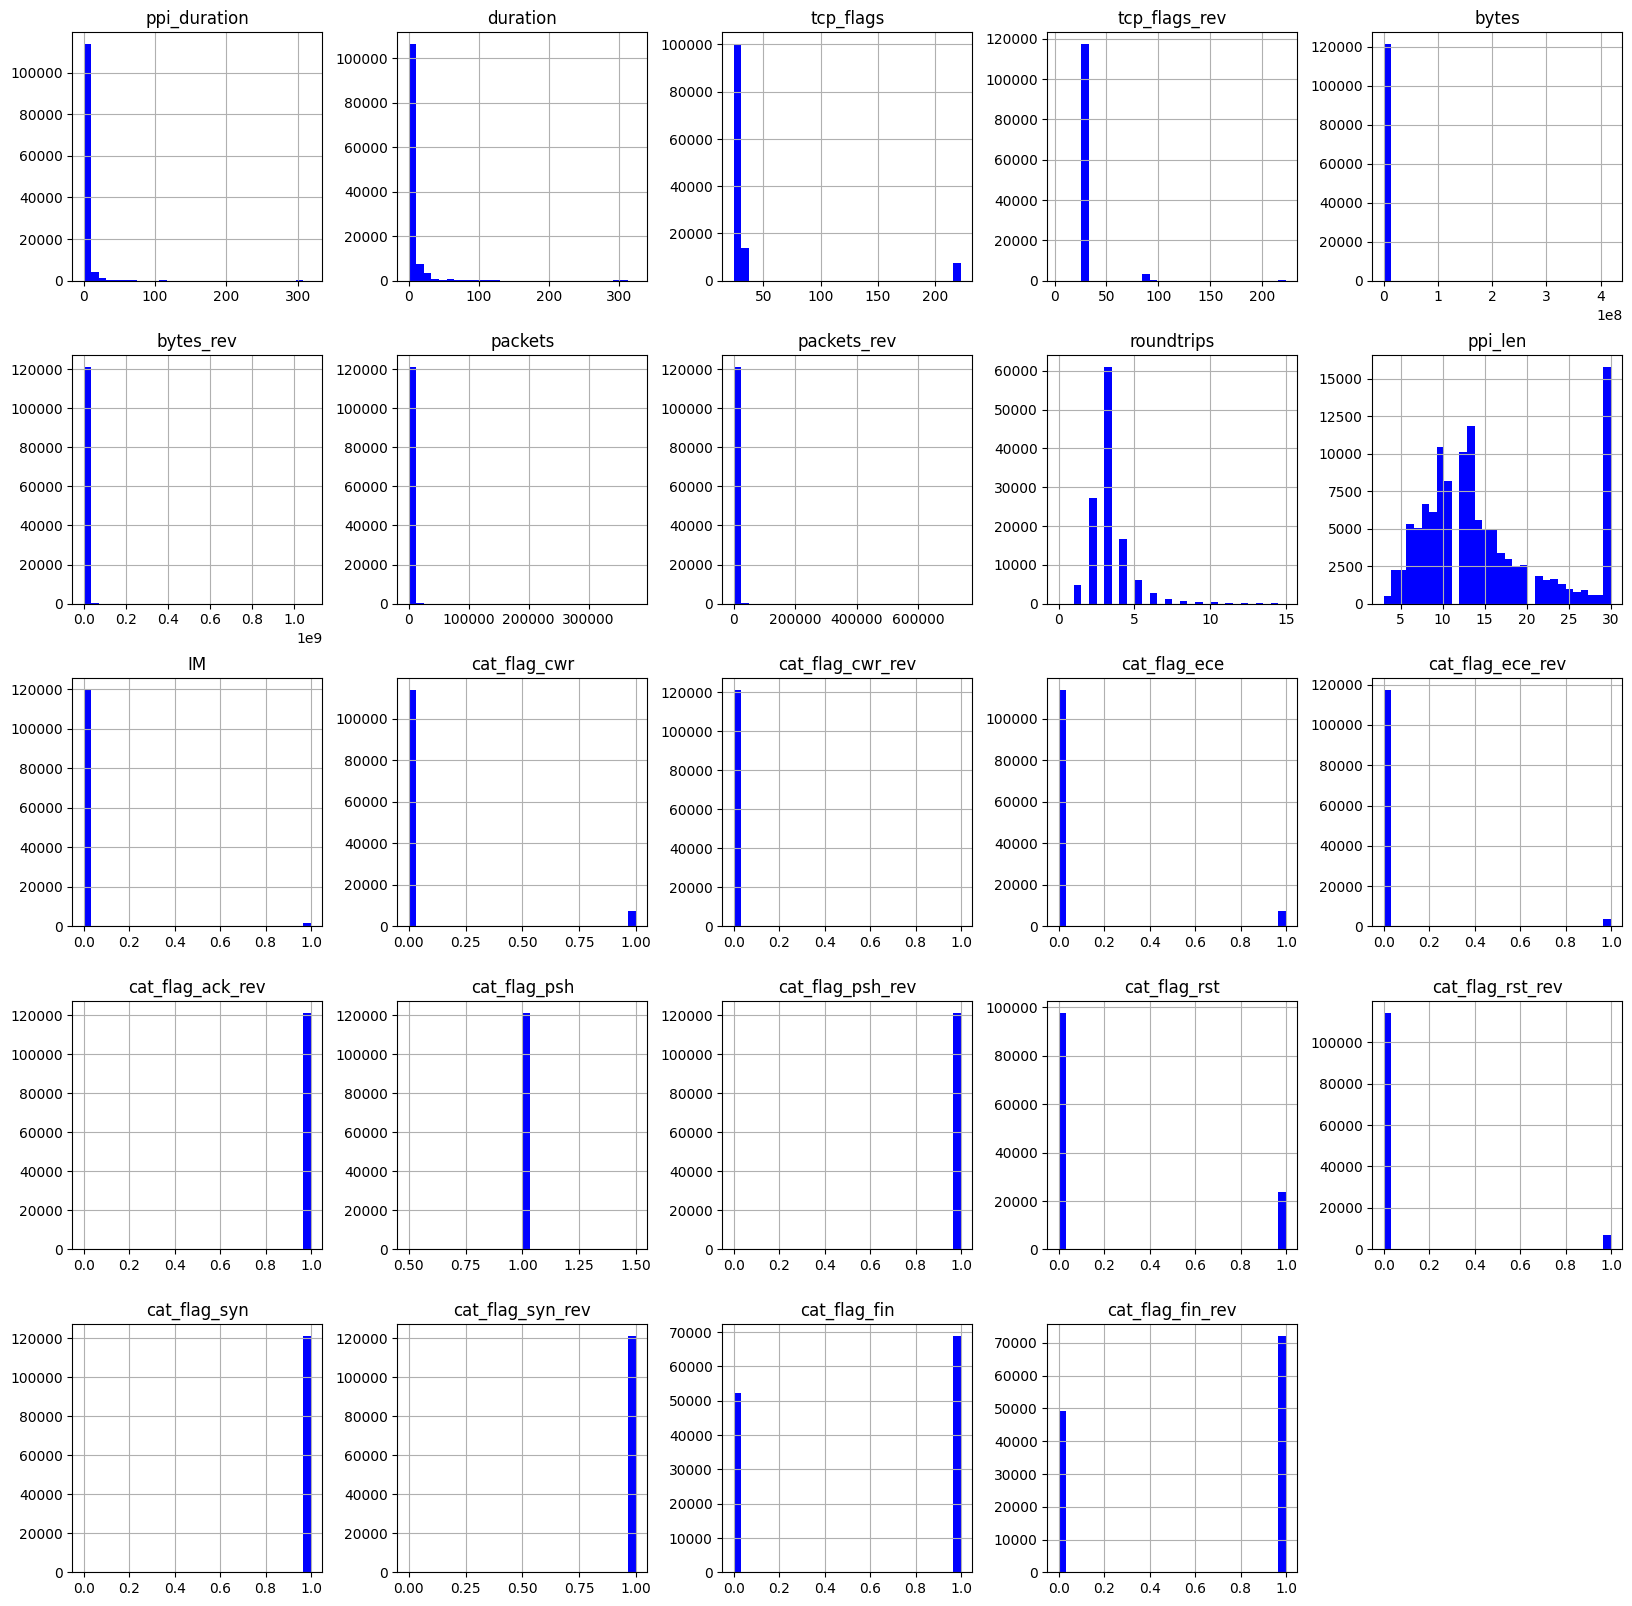

In [ ]:
sample_df.hist(bins = 30, figsize=(20,20), color = 'b')



<Axes: xlabel='ppi_len', ylabel='count'>

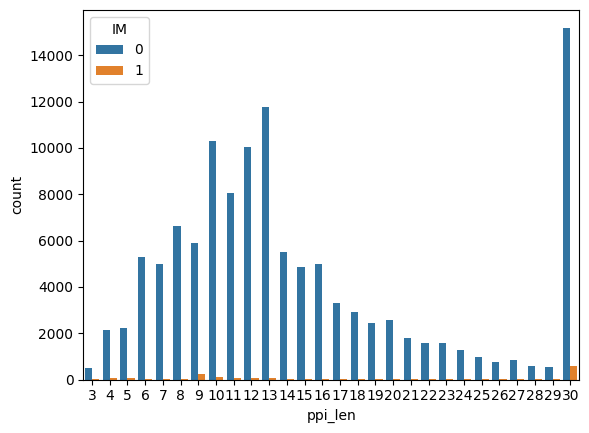

In [ ]:
sns.countplot(x = 'ppi_len', hue = 'IM', data = sample_df)

<Axes: xlabel='roundtrips', ylabel='count'>

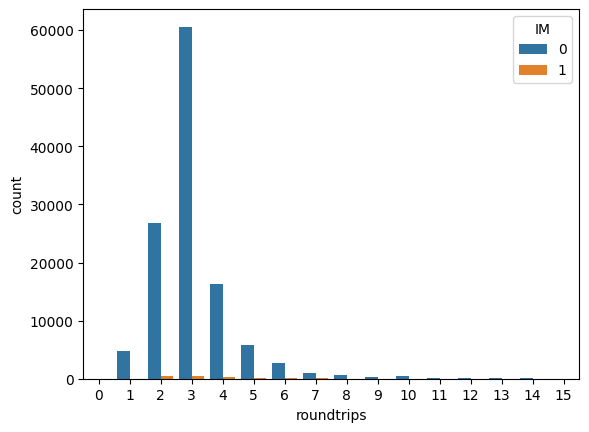

In [ ]:
sns.countplot(x = 'roundtrips', hue = 'IM', data = sample_df)

I tried to have a plot about relationships between numerical columns with Instant messages, but dont have luck, even when i tried with a sample.

In [ ]:
# sns.pairplot(sample_df, hue='IM')


In [ ]:
!pip install pygwalker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.2/650.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.2 MB/s eta 0:00:00


In [ ]:
import pygwalker as pyg
gwalker = pyg.walk(sample_df)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

I wanted to examine if there were correlated variables to eliminate them from the dataset because having variables that are linear combinations of others are not providing more information, so having them becomes redundant, so those with a correlation greater than 75% were eliminated.

In [ ]:
import numpy as np
cor_matrix = sample_df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]


In [ ]:
to_drop

['packets',
 'packets_rev',
 'cat_flag_cwr',
 'cat_flag_ece',
 'cat_flag_ece_rev',
 'cat_flag_fin_rev']

In [ ]:
sample_df.drop(to_drop, axis=1, inplace=True)

For any predictive model it is necessary to perform a preprocessing task to ensure that all variables are on the same scale, which allows to have better results in terms of performance metrics, thus, the numerical variables were standardized.

In [ ]:
data_var = sample_df.columns.values.tolist()
var_y = ['IM']
var_X = [v for v in data_var if v not in var_y]
y = sample_df[var_y]
X = sample_df[var_X]

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


def preprocessing_dataset(x_train):

    numeric_cols = x_train.select_dtypes(
        include=["int", "float"]
    ).columns.to_list()

    # para eliminar una de las dummies cuando se esta aplicando regresión lineal o logistica se usa drop='first' en onehoten
    preprocessor = ColumnTransformer(
        [
            ("scale", StandardScaler(), numeric_cols),
        ],
        remainder="passthrough",
    )

    X_train_prep = preprocessor.fit_transform(x_train)
    datos_train_prep = pd.DataFrame(X_train_prep, columns=numeric_cols)

    return datos_train_prep

In [ ]:
x_train = preprocessing_dataset(X)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
         n_estimators=100,
         n_jobs=-1,
         min_samples_leaf = 1,
         oob_score=True,
         random_state = 42)
rf.fit(x_train, y)

print(f"RF train accuracy: {rf.score(x_train, y):.3f}")

<ipython-input-63-b1074ac7054c>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y)


RF train accuracy: 1.000


To make the selection of variables I used the feature importance technique of the random forest to see which variables gave me more information to detect instant messages, I selected the 4 variables that contributed most to make the prediction

<Axes: >

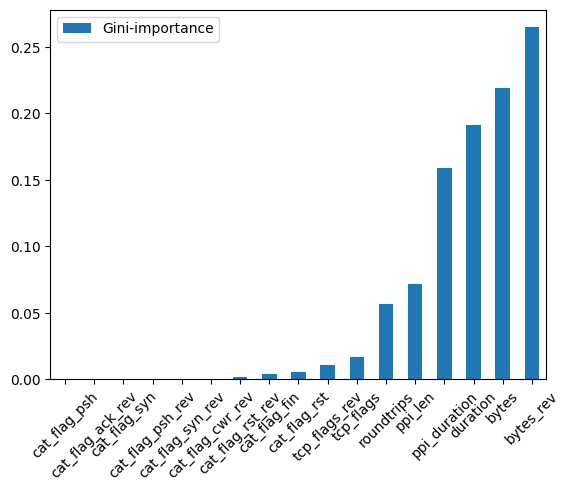

In [ ]:
import pandas as pd
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

In [ ]:
importances.sort_values(by='Gini-importance', inplace=True)

In [ ]:
var_selected = list(importances.tail(4).index)

In [ ]:
X_train_sel = sample_df[var_selected]

In [ ]:
X_train = preprocessing_dataset(X_train_sel)

In [ ]:
from sklearn.model_selection import train_test_split

As there was no validation data, I partitioned the data, in order to have a data that would allow me to validate the performance of the algorithms to be tested.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size = 0.20, random_state=123, stratify=y)
print(len(y_train))
print(len(y_val))

97000
24251


Being a binary classification problem, I chose 4 algorithms that would allow me to identify by the variables previously selected when I had an instant message, all were tested with default hyperparameters and the accuracy of each one was observed in order to select the one you want to use.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

def selection_model_classifier(X_train, y, metric):
  models = []
  models.append(('LOG', LogisticRegression(random_state=123)))
  models.append(('RF', RandomForestClassifier(random_state = 123)))
  models.append(('GB', GradientBoostingClassifier(random_state=123)))
  models.append(('XGB', XGBClassifier(random_state=123)))


  X = X_train.values

  # evaluate each model in turn
  results = []
  names = []
  scoring = metric
  for name, model in models:
      cv = RepeatedKFold(n_splits=10,  n_repeats=3,random_state=123)
      cv_results = cross_val_score(model, X, y, cv=cv, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
      print(msg)
  # boxplot algorithm comparison
  fig = plt.figure()
  fig.suptitle('Algorithm Comparison')
  ax = fig.add_subplot(111)
  plt.boxplot(results)
  ax.set_xticklabels(names)
  plt.show()

  #Devuelve el score y desviacion estandar para cada modelo evaluado

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use

LOG: 0.000000 (0.000000)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

RF: 0.909249 (0.048275)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

GB: 0.654035 (0.078859)
XGB: 0.841643 (0.063615)


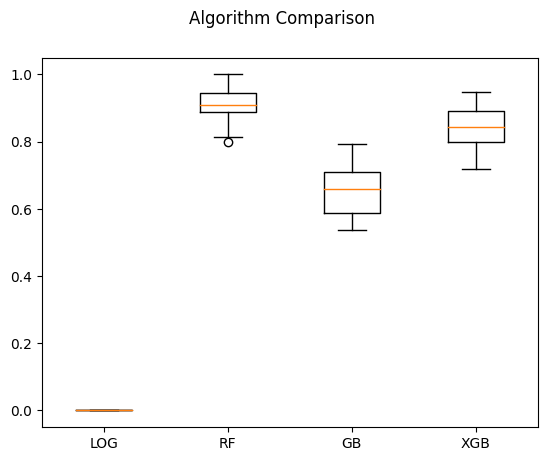

In [ ]:
selection_model_classifier(X_train, y_train, 'precision')

The Random Forest model had the best performance, therefore, it was the selected model

In [ ]:
rf = RandomForestClassifier(random_state = 123)
rf.fit(X_train, y_train)

<ipython-input-80-901123aca945>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(random_state=123)

In [ ]:
y_train_pred = rf.predict(X_val)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, roc_curve


<Figure size 1600x1600 with 0 Axes>

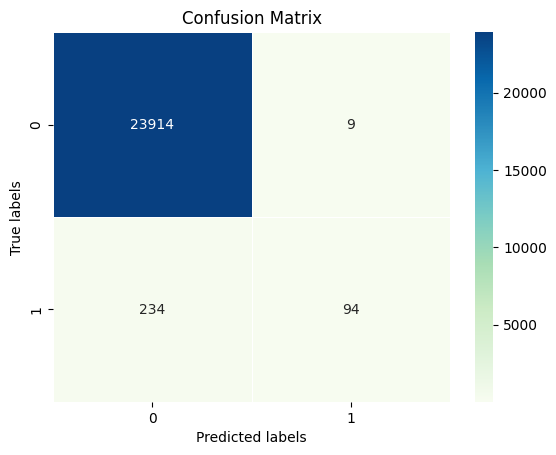

<Figure size 1600x1600 with 0 Axes>

In [ ]:
cm = confusion_matrix( y_val, y_train_pred)
ax= plt.subplot()
sns.heatmap(cm, ax=ax, annot=True, cmap="GnBu", fmt='.5g', linewidths=.5);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
plt.figure(figsize=(16, 16))

In [ ]:
print('Precision: %.3f' % precision_score(y_val, y_train_pred))

Precision: 0.913


In [ ]:
print('Recall: %.3f' % recall_score(y_val, y_train_pred))

Recall: 0.287


In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_val, y_train_pred))

Accuracy: 0.990


In [ ]:
print('F1 Score: %.3f' % f1_score(y_val, y_train_pred))

F1 Score: 0.436


In [ ]:
y_pred_proba = rf.predict_proba(X_val)[::,1]
auc = roc_auc_score(y_val, y_pred_proba)
print(auc)

0.8984597942790028


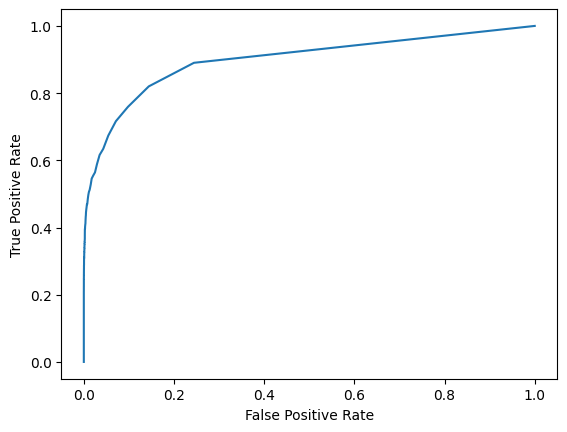

In [ ]:
fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print(classification_report(y_val, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     23923
           1       0.91      0.29      0.44       328

    accuracy                           0.99     24251
   macro avg       0.95      0.64      0.72     24251
weighted avg       0.99      0.99      0.99     24251



The results of this model show that it has a quite good accuracy and precision, while the recall is low (26%), which affects the f1-score. It can be seen that the classification power for true negatives is quite good, resulting in very low false positives in this model.

In [ ]:
df_test = pl.read_parquet('/content/drive/MyDrive/assessment_data/evaulation_data.parquet')

In [ ]:
df_test.shape

(5284744, 29)

In [ ]:
df_test_sel = df_test[var_selected]

In [ ]:
df_test_sel = df_test_sel.to_pandas()

In [ ]:
X_test = preprocessing_dataset(df_test_sel)

In [ ]:
y_test = rf.predict(X_test)

In [ ]:
y_test.sum()/len(y_test)

0.0016275149751813901

This process was carried out with the test data, and it was found that it detected less than 1% of instant messages in its entirety, which is much lower compared to the behavior explored previously. However, it can be considered that its precision is good and not affected

### Thoughts:
In this quick exercise, a classification prediction model based on precision was created, but it was done using a simple random sample to explore many more models in a short time. Therefore, it would be interesting to have the computational capacity to train the model with the entire dataset and perform more feature engineering to enrich the data and add more value to the predictions. Considering the problem of imbalanced data, it would have been beneficial to try an oversampling technique to potentially improve the prediction for detecting instant messages (recall). On the other hand, for the given objective (precision), hyperparameter optimization was not necessary, but it could have been helpful in a scenario where we aimed to enhance the ability to detect instant messages.